# Storytelling: Data Science Salaries and Career Progression

## Introduction
### This analysis explores a dataset of data science salaries to uncover insights that can help professionals make informed decisions regarding their careers and salary expectations. 
### As well as offering insights for hiring managers and HR professionals in the tech industry. The goal for HR companies is to understand how salary dynamics can influence recruitment strategies and employee retention.
### The study focuses on the financial impact of changing job roles within the data science field and how experience and company size influence salary.

## Methodology
### For this analysis, the following steps were taken:

- #### Creating the various hetmaps in order to find correlations in dataset.
- #### Categorizing job titles into broader roles using the spaCy library to simplify the dataset and enhance clarity.
- #### Calculating average salaries for categorized roles to determine the potential salary changes when switching roles.
- #### Utilizing descriptive statistics and correlation analysis to explore how different factors such as experience level and company size relate to salaries.
- #### Visualizing the data using box plots and heat maps to aid in the interpretation of the findings.

In [354]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [355]:
data_salary = pd.read_csv('/Users/pilatuspc12/Documents/GitHub/DS_mini_projects/DS_salary/ds_salaries.csv')


In [356]:
data_salary.head(30)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [357]:
#count how many rows in dataset
print(f"Number of rows in dataset: {data_salary.shape[0]}")

Number of rows in dataset: 3755


In [358]:
#count how many US region employees
us_region_count = data_salary[data_salary['employee_residence'] == 'US'].shape[0]
print(f"Number of US region employees: {us_region_count}")


Number of US region employees: 3004


In [359]:
#optional filtering US employees only
#data_salary = data_salary[data_salary['employee_residence'] == 'US']

In [360]:
data_salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [361]:
#descriptive statistics
data_salary.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [362]:
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [363]:
# Group by experience level and calculate mean salary
experience_salary = data_salary.groupby('experience_level')['salary_in_usd'].mean().sort_values()


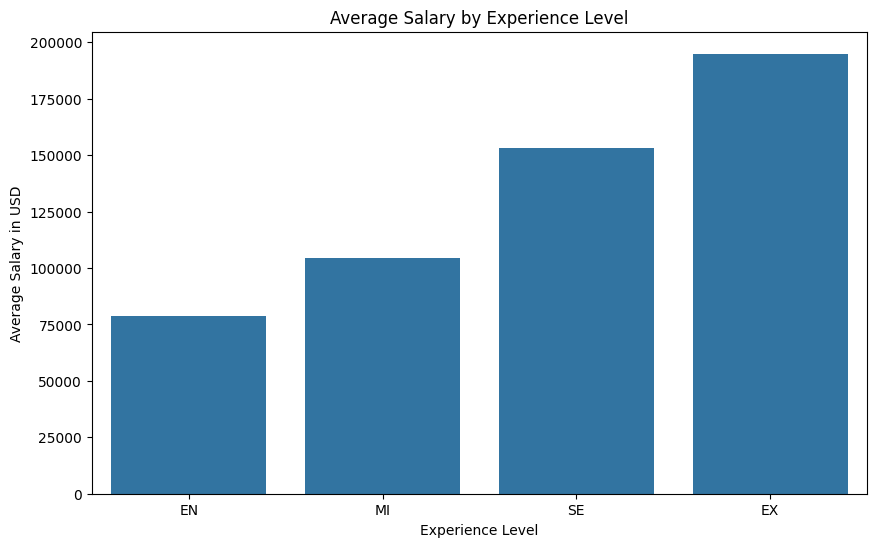

In [364]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=experience_salary.index, y=experience_salary.values)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.show()

In [365]:
#salary difference between EN, MI, SE, EX
# Salary difference between experience levels
EN_average = data_salary[data_salary['experience_level'] == 'EN']['salary_in_usd'].mean()
MI_average = data_salary[data_salary['experience_level'] == 'MI']['salary_in_usd'].mean()
SE_average = data_salary[data_salary['experience_level'] == 'SE']['salary_in_usd'].mean()
EX_average = data_salary[data_salary['experience_level'] == 'EX']['salary_in_usd'].mean()

# Create a DataFrame with the averages
experience_level_averages = pd.DataFrame({'Average Salary': [EN_average, MI_average, SE_average, EX_average]}, index=['EN', 'MI', 'SE', 'EX'])

#difference in salary  between EN, MI, SE, EX
salary_diff = pd.DataFrame({'Difference': experience_level_averages['Average Salary'].diff()})
salary_diff = salary_diff.rename(index={0: 'EN', 1: 'MI', 2: 'SE', 3: 'EX'})

diff_en_mi_per = (MI_average - EN_average) / EN_average * 100
diff_mi_se_per = (SE_average - MI_average) / MI_average * 100
diff_se_ex_per = (EX_average - SE_average) / SE_average * 100


diff_en_mi = (MI_average - EN_average) 
diff_mi_se = (SE_average - MI_average) 
diff_se_ex = (EX_average - SE_average) 

#printing the results
print(f'Difference in salary between EN and MI levels: {diff_en_mi:.2f} USD ({diff_en_mi_per:.2f}%)')
print(f'Difference in salary between MI and SE levels: {diff_mi_se:.2f} USD ({diff_mi_se_per:.2f}%)')
print(f'Difference in salary between SE and EX levels: {diff_se_ex:.2f} USD ({diff_se_ex_per:.2f}%)')

Difference in salary between EN and MI levels: 25979.65 USD (33.08%)
Difference in salary between MI and SE levels: 48525.13 USD (46.42%)
Difference in salary between SE and EX levels: 41879.86 USD (27.36%)


In [366]:
# Exclude non-relevant and non-numeric columns
columns_to_exclude = ['salary_currency', 'employee_residence', 'company_location', 'job_title']
data_filtered = data_salary.drop(columns=columns_to_exclude)


In [367]:
# Convert remaining categorical columns to dummy variables
data_encoded = pd.get_dummies(data_filtered, columns=['experience_level', 'company_size', 'employment_type'])

# Calculate the correlation matrix
corr_matrix = data_encoded.corr()
salary_corr = corr_matrix['salary_in_usd'].sort_values(ascending=False)

# Print the correlations
print(salary_corr)

salary_in_usd          1.000000
experience_level_SE    0.349900
work_year              0.228290
company_size_M         0.201830
experience_level_EX    0.160986
employment_type_FT     0.118263
employment_type_CT    -0.019772
salary                -0.023676
remote_ratio          -0.064171
employment_type_FL    -0.070292
employment_type_PT    -0.104864
company_size_L        -0.113346
company_size_S        -0.190663
experience_level_MI   -0.273791
experience_level_EN   -0.285743
Name: salary_in_usd, dtype: float64


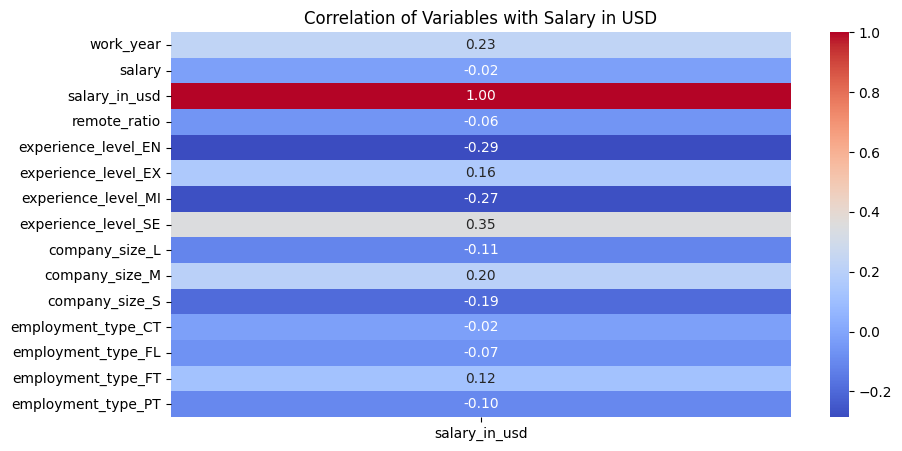

In [368]:

# Plotting the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix[['salary_in_usd']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Variables with Salary in USD')
plt.show()


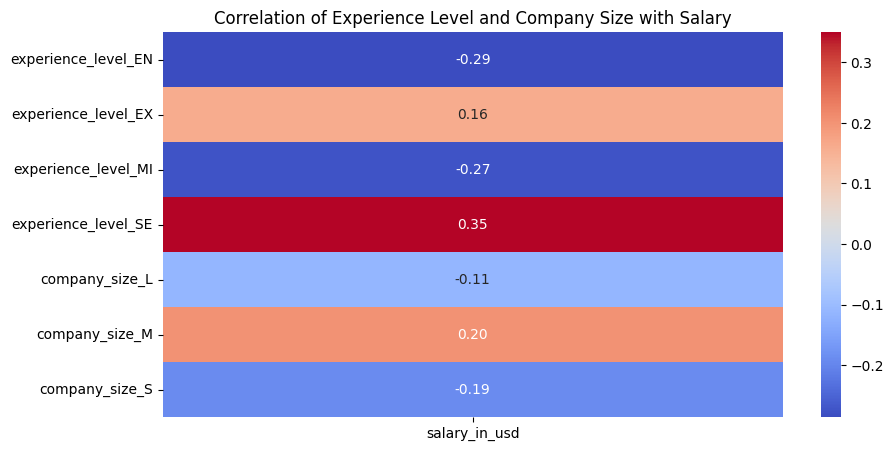

In [369]:
# Transpose the correlation matrix to swap rows and columns
corr_matrix_transposed = corr_matrix[[col for col in corr_matrix.columns if 'experience_level' in col or 'company_size' in col]].loc[['salary_in_usd'], :].T

# Plotting the heatmap with horizontal bars
plt.figure(figsize=(10, 5)) 
sns.heatmap(corr_matrix_transposed,
            annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'orientation': 'vertical'})
plt.title('Correlation of Experience Level and Company Size with Salary')
plt.show()


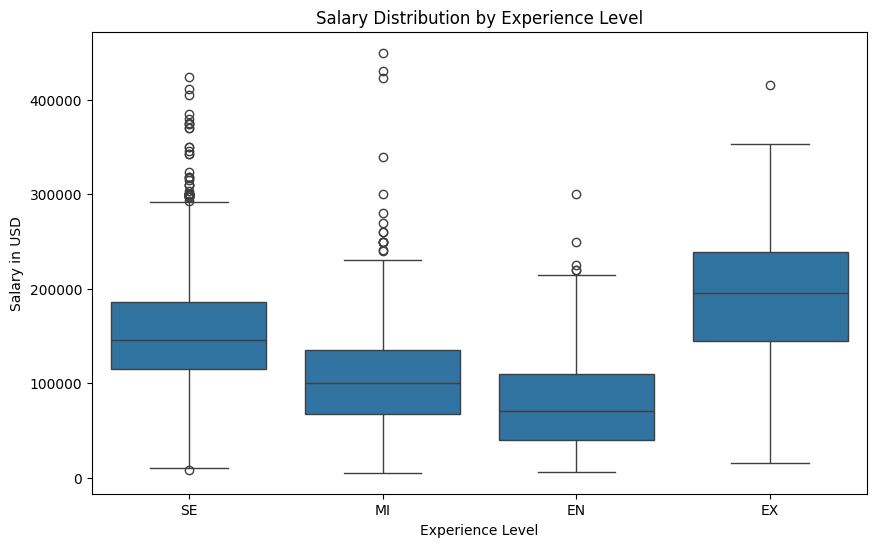

In [370]:
# Plotting salary distribution by experience level

plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data_salary)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

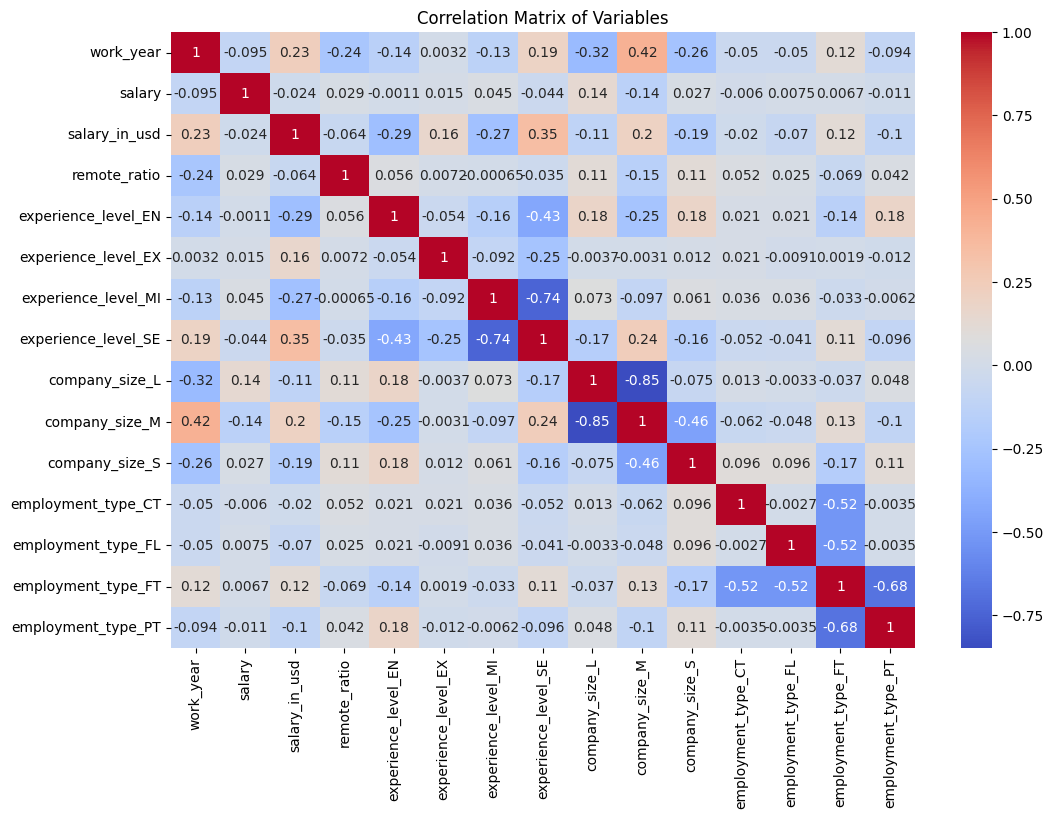

In [371]:
plt.figure(figsize=(12, 8))
corr_matrix = data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

### Key findings from heat map above 
1. Experience Level and Salary: Senior-level experience (denoted as experience_level_SE) has a positive correlation of 0.35 with salary_in_usd, the strongest among experience levels. This implies that, on average, senior professionals earn more. Conversely, entry-level (experience_level_EN) and mid-level (experience_level_MI) have negative correlations of -0.29 and -0.27, respectively, with salary, suggesting these roles typically command lower compensation.
2. Company Size: Medium-sized companies (company_size_M) have a positive correlation of 0.20 with salary_in_usd, indicating a tendency for medium-sized companies to pay more than smaller (company_size_S) or larger (company_size_L) companies, though the correlation is not very strong.
3. Employment Type: Full-time employment (employment_type_FT) shows a mild positive correlation (0.12) with salary, which could indicate that full-time roles tend to offer better salaries compared to part-time (employment_type_PT) roles, which have a negative correlation (-0.10) with salary.

In [372]:
#optional correlation between job_title and salary_in_usd

#let's encode job_title column
categorical_columns = ['job_title', 'experience_level']
encoded_data = pd.get_dummies(data_salary, columns=categorical_columns)

In [373]:
# Check if there are any object type columns left
non_numeric_columns = encoded_data.select_dtypes(include=['object']).columns
if non_numeric_columns.empty:
    # If no non-numeric columns are present, we can compute the correlation matrix
    corr_matrix = encoded_data.corr()
    # Extracting the correlation of 'salary_in_usd' with other variables
    salary_corr = corr_matrix['salary_in_usd'].sort_values(ascending=False)
else:
    # If there are non-numeric columns, list them out and consider encoding them as well
    print(f"Non-numeric columns still in the dataset: {non_numeric_columns}")

# Print the correlation values
print(salary_corr)



Non-numeric columns still in the dataset: Index(['employment_type', 'salary_currency', 'employee_residence',
       'company_location', 'company_size'],
      dtype='object')
salary_in_usd          1.000000
experience_level_SE    0.349900
work_year              0.228290
company_size_M         0.201830
experience_level_EX    0.160986
employment_type_FT     0.118263
employment_type_CT    -0.019772
salary                -0.023676
remote_ratio          -0.064171
employment_type_FL    -0.070292
employment_type_PT    -0.104864
company_size_L        -0.113346
company_size_S        -0.190663
experience_level_MI   -0.273791
experience_level_EN   -0.285743
Name: salary_in_usd, dtype: float64


In [374]:
#counting job_titles in data set
print(f"Number of unique job titles in the dataset: {len(data_salary['job_title'].unique())}")

Number of unique job titles in the dataset: 93


In [375]:

#getting all unique values of job_title column from main df and printing them
print(data_salary['job_title'].unique())


['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data Infrastructure Engineer' 'Software Data Engine

In [376]:
#!pip install spacy

In [377]:
#!python -m spacy download en_core_web_sm

In [378]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm") 

In [379]:
def categorize_job_title(job_title):
    title_lower = job_title.lower()

    # Checking for combined management and specific roles
    if any(kw in title_lower for kw in ['manager', 'lead', 'head', 'principal']) and 'machine learning' in title_lower:
        return 'Management'  #priority for management!!!

    if 'machine learning' in title_lower or 'ml' in title_lower:
        return 'Machine Learning'
    elif 'scientist' in title_lower:
        return 'Data Scientist'
    elif 'engineer' in title_lower or 'developer' in title_lower or 'architect' in title_lower:
        return 'Engineer'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif any(kw in title_lower for kw in ['manager', 'lead', 'head', 'principal']):
        return 'Management'
    else:
        return 'Other'

# Applying function
data_salary['job_category'] = data_salary['job_title'].apply(categorize_job_title)



In [380]:
print(data_salary['job_category'].value_counts())

job_category
Engineer            1422
Data Scientist      1027
Analyst              684
Machine Learning     405
Management           150
Other                 67
Name: count, dtype: int64


In [381]:
#printing example of  machine learning job titles
print(data_salary[data_salary['job_category'] == 'Machine Learning']['job_title'].drop_duplicates())

1                                    ML Engineer
27                     Machine Learning Engineer
82             Applied Machine Learning Engineer
324                  Machine Learning Researcher
480                   Machine Learning Scientist
495                               MLOps Engineer
574           Applied Machine Learning Scientist
908     Machine Learning Infrastructure Engineer
1139          Machine Learning Software Engineer
1704          Machine Learning Research Engineer
1867                  Machine Learning Developer
Name: job_title, dtype: object


In [382]:
print(data_salary[['job_title', 'job_category']].head(50))

                         job_title      job_category
0         Principal Data Scientist    Data Scientist
1                      ML Engineer  Machine Learning
2                      ML Engineer  Machine Learning
3                   Data Scientist    Data Scientist
4                   Data Scientist    Data Scientist
5                Applied Scientist    Data Scientist
6                Applied Scientist    Data Scientist
7                   Data Scientist    Data Scientist
8                   Data Scientist    Data Scientist
9                   Data Scientist    Data Scientist
10                  Data Scientist    Data Scientist
11                    Data Analyst           Analyst
12                    Data Analyst           Analyst
13               Applied Scientist    Data Scientist
14               Applied Scientist    Data Scientist
15                    Data Modeler             Other
16                    Data Modeler             Other
17                  Data Scientist    Data Sci

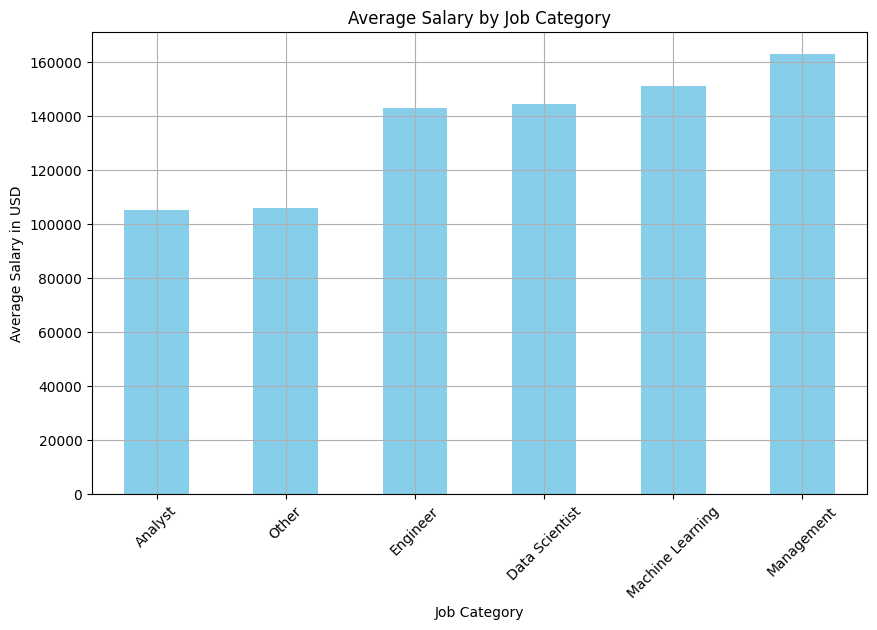

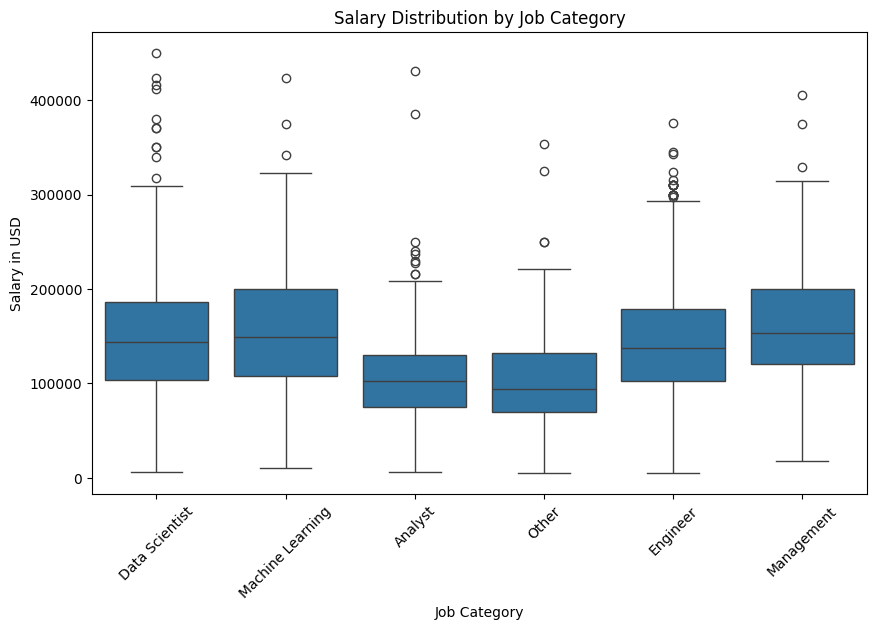

In [383]:
# Calculating the average salary for each category
average_salaries = data_salary.groupby('job_category')['salary_in_usd'].mean()

# Creating a bar plot for average salaries
plt.figure(figsize=(10, 6))
average_salaries.sort_values().plot(kind='bar', color='skyblue', grid=True)
plt.title('Average Salary by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.show()

# Creating a box plot for salary distribution within each category
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_category', y='salary_in_usd', data=data_salary)
plt.title('Salary Distribution by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()

/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_51152/3392480650.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_data = data_salary.groupby('job_category').apply(lambda x: remove_outliers(x, 'salary_in_usd')).reset_index(drop=True)


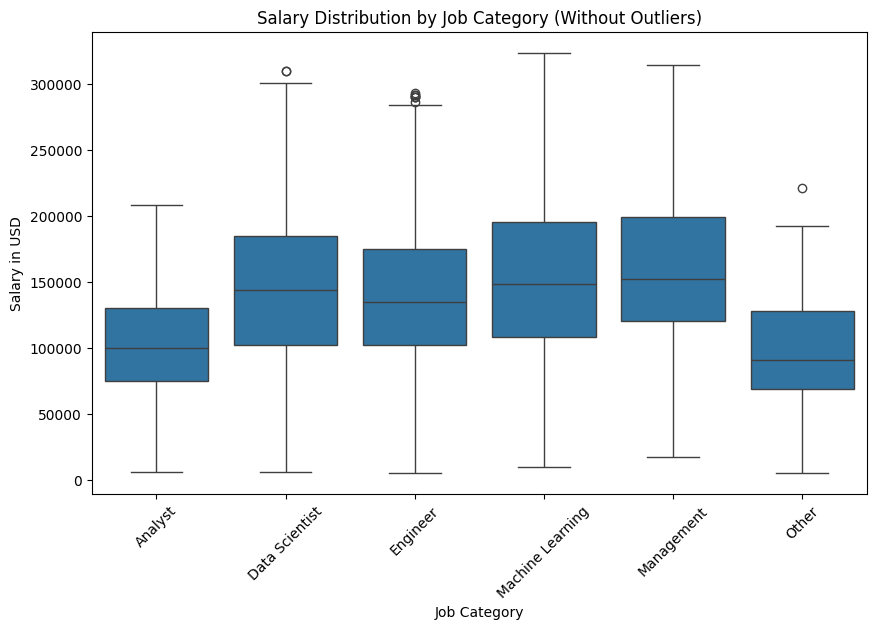

In [384]:
#removing outliers (check)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# function to each category
filtered_data = data_salary.groupby('job_category').apply(lambda x: remove_outliers(x, 'salary_in_usd')).reset_index(drop=True)

# Plotting the box plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_category', y='salary_in_usd', data=filtered_data)
plt.title('Salary Distribution by Job Category (Without Outliers)')
plt.xlabel('Job Category')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()

In [385]:
#printing the results of average salaries
round(average_salaries, 0)

job_category
Analyst             105292.0
Data Scientist      144567.0
Engineer            142992.0
Machine Learning    151081.0
Management          163077.0
Other               106004.0
Name: salary_in_usd, dtype: float64

### Role transition

In [386]:
#calculating the average salary diff when switching the roles from Analyst to Data Scientist, 
#from analyst to engineer, 
#from data scientist to engineer, 
#from data scientist to machine learning, 
#from engineer to machine learning, 
#from data scientist to management, 
#from engineer to management, 
#from machine learning to management.

category_average_salaries = data_salary.groupby('job_category')['salary_in_usd'].mean()

#role transition 
role_transition = [
    ('Analyst', 'Data Scientist'),
    ('Analyst', 'Engineer'),
    ('Data Scientist', 'Engineer'),
    ('Data Scientist', 'Machine Learning'),
    ('Engineer', 'Machine Learning'),
    ('Data Scientist', 'Management'),
    ('Engineer', 'Management'),
    ('Machine Learning', 'Management')
]

#salary difference
salary_difference = []
for start, end in role_transition:
    diff = category_average_salaries[end] - category_average_salaries[start]
    salary_difference.append(diff)

In [387]:
# Creating a DataFrame from the role transitions and salary differences
transition_df = pd.DataFrame(role_transition, columns=['From', 'To'])
transition_df['Salary Difference (USD)'] = salary_difference

# Printing the results
print(transition_df)

               From                To  Salary Difference (USD)
0           Analyst    Data Scientist             39274.944884
1           Analyst          Engineer             37700.024891
2    Data Scientist          Engineer             -1574.919994
3    Data Scientist  Machine Learning              6514.385882
4          Engineer  Machine Learning              8089.305876
5    Data Scientist        Management             18510.124648
6          Engineer        Management             20085.044641
7  Machine Learning        Management             11995.738765


## Calculating the average salary difference when switching the roles for US region employees only

In [393]:
#US
data_salary_us = data_salary[data_salary['employee_residence'] == 'US']
us_category_avg_salaries = data_salary_us.groupby('job_category')['salary_in_usd'].mean()

salary_difference_us = []
for start, end in role_transition:
    diff = us_category_avg_salaries[end] - us_category_avg_salaries[start]
    salary_difference_us.append(diff)



In [394]:
# Creating a DataFrame from the role transitions and salary differences
transition_df = pd.DataFrame(role_transition, columns=['From', 'To'])
transition_df['Salary Difference (USD)'] = salary_difference_us

# Printing the results
print(transition_df)

               From                To  Salary Difference (USD)
0           Analyst    Data Scientist             47413.327959
1           Analyst          Engineer             38426.155819
2    Data Scientist          Engineer             -8987.172140
3    Data Scientist  Machine Learning             10378.995225
4          Engineer  Machine Learning             19366.167365
5    Data Scientist        Management             15168.884650
6          Engineer        Management             24156.056790
7  Machine Learning        Management              4789.889424


## Key Insights
- ### Salary Differences by Role: Significant salary variations exist when transitioning between roles; for example, moving from an Analyst to a Data Scientist can lead to substantial salary increases.
- ### Experience Level Impact:  Salary positively correlates with experience level, indicating that higher experience demands higher pay, which should be considered in recruitment strategies to attract seasoned professionals.
- ### Company Size Influence: Salaries in medium-sized companies have a positive correlation with compensation, suggesting these companies often offer competitive pay. 

## Visualizations

### Box Plots: Displayed salary distributions in expirience level and across different job categories, showing the spread and extremes within each group.
### Heat Maps: Provided a visual representation of the correlations between salary and various factors like experience level and company size.

## Recommendations
- ### Career Advancement for Proffesionals: Professionals should consider advancing to senior roles or transitioning into higher-paying categories such as Data Scientist or Machine Learning roles.
- ### Salary structure for HR companies: It's crucial to structure salary packages that are competitive within the market, especially when trying to attract top talent in senior roles.
- ### Employment Strategy: Working for medium-sized companies could be beneficial as they often provide a good balance of competitive salaries and growth opportunities.
- ### Skill Development: Highlighting career advancement and continuous learning opportunities can make positions more attractive to candidates, aligning with the observed salary increases tied to experience and role advancement.

## Conclusion
### The analysis clearly shows that role transitions, experience levels, and company sizes are crucial in determining salaries in the data science field. 
### By understanding these factors, data science professionals can strategically plan their career paths and enhance their earning potential. 
### This study provides actionable insights for navigating the complex landscape of data science careers.

### For hiring managers and HR professionals, knowing the salary landscape in data science can improve recruitment strategies and maintain a competitive edge. 
### By using these insights, companies can attract, keep, and motivate top talent, ensuring they meet industry salary standards and match employee expectations.